In [1]:
# Imports

from __future__ import print_function

# Keras
import keras

# Other
import random
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd

/usr/local/lib/python3.5/dist-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
# Put these at the top of every notebook, to get automatic reloading and inline plotting

# This is a bit of magic to make matplotlib figures appear inline in the
# notebook rather than in a new window.
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# Some more magic so that the notebook will reload external python modules;
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

# Load Data

In [3]:
from utils.prepare_data import*

ref_q, inputs = load_data(verbose=True)

Reference questions:
 [['We hold ourselves and our team members accountable for results'
  'TEA.2']
 ['The information I need to do my job effectively is readily available'
  'ENA.3']
 ['I know what I need to do to be successful in my role' 'ALI.5']
 ['We are encouraged to be innovative even though some of our initiatives may not succeed'
  'INN.2']]

Labelled data:
 [['I know what my goals are and what I need to do to be successful in my role'
  'ALI.5']
 ['I feel like I can be successful in my role' 'ALI.5']
 ['I know what I need to do to be successful in my role' 'ALI.5']
 ['I understand my role and what is expected of me' 'ALI.5']
 ['I know what is expected of me in my role.' 'ALI.5']]


In [4]:
from utils.prepare_data import *
x_train, y_train, tokenizer, max_length, vocab_size = create_training_vectors(inputs)

Inputs shape:  (297, 20)
Targets shape:  (297, 4)


## Make Network

In [5]:
from utils.model import *

model = build_model(vocab_size, max_length)

Model properties:
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 20, 5)             970       
_________________________________________________________________
lstm_1 (LSTM)                (None, 5)                 220       
_________________________________________________________________
dense_1 (Dense)              (None, 4)                 24        
Total params: 1,214
Trainable params: 1,214
Non-trainable params: 0
_________________________________________________________________


In [6]:
# Train Model
from keras.callbacks import ModelCheckpoint

# Callbacks
checkpointer = ModelCheckpoint('model/model', monitor='val_loss', verbose=0, save_best_only=True, save_weights_only=False, mode='auto', period=1)
    
history = model.fit(x_train, y_train,
                   batch_size=32, epochs=250,
                   verbose=0,
                   validation_split=0.2,
                   shuffle=True,
                   callbacks=[checkpointer])

In [7]:
# Evalute Model

score = model.evaluate(x_train, y_train, verbose=0)
print('    Overall Loss: %.4f' % score[0])
print('Overall Accuracy: %.2f%%' % (score[1]*100))

    Overall Loss: 0.0011
Overall Accuracy: 100.00%


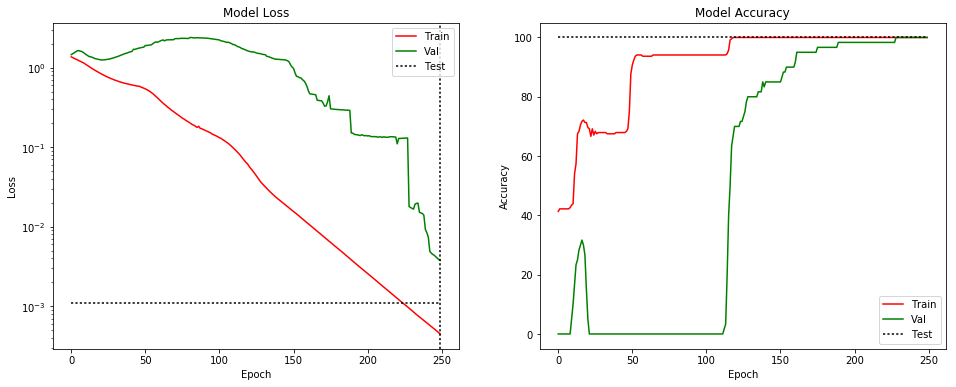

In [8]:
from utils.plots import *

plot_loss(history, score)

## Test Model

In [9]:
from utils.prepare_data import *

x_test = load_test_data(tokenizer, max_length, verbose=True)

In [10]:
from utils.model import *
test_outputs = predict_with_model(x_test)

In [11]:
test_outputs

array([[9.9991262e-01, 4.1461524e-05, 4.8654310e-06, 4.1019892e-05],
       [1.8026251e-06, 5.0660095e-05, 9.9960178e-01, 3.4581547e-04],
       [1.8029328e-06, 5.0668266e-05, 9.9960178e-01, 3.4582338e-04],
       [9.9991262e-01, 4.1458996e-05, 4.8649536e-06, 4.1015825e-05],
       [9.9990988e-01, 4.3785341e-05, 5.0850790e-06, 4.1292955e-05],
       [1.1271603e-04, 1.6031588e-03, 1.1684493e-03, 9.9711573e-01],
       [1.8026939e-06, 5.0661838e-05, 9.9960178e-01, 3.4581748e-04],
       [1.6390925e-04, 9.9950647e-01, 7.2924180e-05, 2.5661773e-04],
       [9.9991262e-01, 4.1458996e-05, 4.8649536e-06, 4.1015825e-05],
       [1.6390925e-04, 9.9950647e-01, 7.2924180e-05, 2.5661773e-04]],
      dtype=float32)

In [12]:
from utils.results import*

first_ind, first_q, first_code = top_result(test_outputs, ref_q)

In [13]:
first_ind, first_q, first_code

(array([0, 2, 2, 0, 0, 3, 2, 1, 0, 1]),
 ['We hold ourselves and our team members accountable for results',
  'I know what I need to do to be successful in my role',
  'I know what I need to do to be successful in my role',
  'We hold ourselves and our team members accountable for results',
  'We hold ourselves and our team members accountable for results',
  'We are encouraged to be innovative even though some of our initiatives may not succeed',
  'I know what I need to do to be successful in my role',
  'The information I need to do my job effectively is readily available',
  'We hold ourselves and our team members accountable for results',
  'The information I need to do my job effectively is readily available'],
 ['TEA.2',
  'ALI.5',
  'ALI.5',
  'TEA.2',
  'TEA.2',
  'INN.2',
  'ALI.5',
  'ENA.3',
  'TEA.2',
  'ENA.3'])

In [14]:
# second_ind, second_q, second_code = second_result(test_outputs, ref_q, first_ind)
outputs = second_result(test_outputs, ref_q, first_ind)

In [ ]:
second_ind, second_q, second_code

In [ ]:
test_outputs

In [ ]:
first_ind